# METAC DATA PREP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
import math
import os
import glob

# Load Data

- [x] behavioural data (Island Jumping Task)
- [ ] slider position logs (IJT)
- [ ] physiological data (Island Jumping Task)
- TNUSurvey (and/or REDCap)
    - [ ] online prescreening data
    - [ ] online questionnaire data 
- REDCap
    - [ ] experiment day questionnaires
    - [ ] debriefing

In [3]:
# TEMP load slider logui

l_file = r"data\TNU_METAC_9999_breathtest_240624_1029.logui"
l_colnames = ['date', 'time', 'ui', 'value']

l_temp = pd.read_csv(l_file, skiprows=range(6), nrows=5) #, names=l_colnames, header=None)
l_temp.values

array([['[24/06/24 10:29:31.985] (slider) 0.402'],
       ['[24/06/24 10:29:32.002] (slider) 0.410'],
       ['[24/06/24 10:29:32.018] (slider) 0.418'],
       ['[24/06/24 10:29:32.031] (slider) 0.428'],
       ['[24/06/24 10:29:32.047] (slider) 0.440']], dtype=object)

In [20]:
# TEMP load REDCap data

r_basedir = r"P:\METAC_Iglesias\Data"
r_fname = "METAC1_DATA_*.csv"

r_fullpath = os.path.join(r_basedir, r_fname)
r_file = glob.glob(r_fullpath)
print(r_file)

r_temp = pd.read_csv(r_file[0])#, skiprows=range(10), names=p_colnames, header=None)
list(r_temp.columns.values)

['P:\\METAC_Iglesias\\Data\\METAC1_DATA_2024-06-14_1351.csv']


['ppid',
 'redcap_event_name',
 'redcap_repeat_instrument',
 'redcap_repeat_instance',
 'redcap_survey_identifier',
 'ic_sid',
 'ic_screening_no',
 'scheduled_participation',
 'ic_source___1',
 'ic_source___2',
 'ic_source___3',
 'ic_source___4',
 'ic_source___na',
 'ic_source___nad',
 'ic_source___nac',
 'ic_source___nd',
 'ic_source___unk',
 'ic_pid',
 'ic_date',
 'ic_time',
 'ic_experimenter',
 'ic_location',
 'ic_version',
 'ic_incidental_findings',
 'ic_inform_doctor',
 'ic_available',
 'ic_included',
 'ic_notes',
 'ic_ae',
 'informed_consent_complete',
 'further_use_source___1',
 'further_use_source___2',
 'further_use_source___3',
 'further_use_source___4',
 'further_use_source___na',
 'further_use_source___nad',
 'further_use_source___nac',
 'further_use_source___nd',
 'further_use_source___unk',
 'fur_use_pid',
 'fur_use_withdrawal_study',
 'fur_use_discontinuation',
 'reason_discontinuation',
 'fur_use_data',
 'fur_use_withdrawal',
 'fur_use_withdrawal_date',
 'fur_use_person

In [40]:
r_temp['ppid']
r_temp['psqi_score']
r_temp['debrief_source_data___4']
r_temp['fas_total_score']
r_temp['fas_exp_total_score']
r_temp['mfis_exp_total_score']

# Create a visualization
# sns.relplot(data=r_temp, x="ppid", y="psqi_score")

0      10.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
109    21.0
110     NaN
111     7.0
112     NaN
113     NaN
Name: mfis_exp_total_score, Length: 114, dtype: float64

In [3]:
# TEMP load physiology data
b_basedir = r"T:\METAC\behavior\raw\Temporary"
p_fname = "behavior\\LabChart\\*.txt"
ppid = "TNU_METAC_9011"
p_fullpath = os.path.join(b_basedir, ppid, p_fname)
for p_file in glob.glob(p_fullpath):
        if p_file.find("task") != -1:
            print(str(p_file))

            p_colnames = ['t', 'M', 'Pulse', 'T', 'O2', 'CO2', 'F', 'V']
            p_temp = pd.read_csv(p_file, skiprows=range(10), names=p_colnames, header=None)
            
            print(p_temp)

            # p_specs = pd.read_csv(p_file, nrows=1)
            # print(p_specs)

T:\METAC\behavior\raw\Temporary\TNU_METAC_9011\behavior\LabChart\TNU_METAC_9011_task.txt


C:\Users\alhess\AppData\Local\Temp\ipykernel_17548\4088957236.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  p_temp = pd.read_csv(p_file, skiprows=range(10), names=colnames, header=None)


            t              M        Pulse            T           O2  \
0     001\t-0    2518242\t-0    000125\t0   003125\t20     62188\t0   
0     002\t-0  5120855\t0\t0    00375\t20     61875\t0  0340625\t-0   
0     003\t-0  9935689\t0\t0  0034375\t20       625\t0  0346875\t-0   
0     004\t-1     605183\t-6   25e-005\t0  0040625\t20     61875\t0   
0     005\t-2   151732\t0\t0    00375\t20     62188\t0      035\t-0   
...       ...            ...          ...          ...          ...   
3218  895\t-2     385967\t-0      0035\t0     0025\t20     53438\t0   
3218  896\t-2     372954\t-0   0036875\t0   003125\t20      5375\t0   
3218  897\t-2     372954\t-0     00375\t0    00375\t20      5375\t0   
3218  898\t-2     385967\t-0    003875\t0   003125\t20     53125\t0   
3218  899\t-2      39898\t-0    004125\t0   003125\t20     54063\t0   

               CO2             F          V  
0      0340625\t-0    043632\t-8    6.91406  
0       043632\t-0    0001304932        NaN  
0     043

In [4]:
p_temp

,t,M,Pulse,T,O2,CO2,F,V
0,001\t-0,2518242\t-0,000125\t0,003125\t20,62188\t0,0340625\t-0,043632\t-8,6.91406
0,002\t-0,5120855\t0\t0,00375\t20,61875\t0,0340625\t-0,043632\t-0,0001304932,NaN
0,003\t-0,9935689\t0\t0,0034375\t20,625\t0,0346875\t-0,04344706\t-0,0001739807,NaN
0,004\t-1,605183\t-6,25e-005\t0,0040625\t20,61875\t0,034375\t-0,04344706\t-0,2173767.0
0,005\t-2,151732\t0\t0,00375\t20,62188\t0,035\t-0,043632\t-0,0002610474,NaN
...,...,...,...,...,...,...,...,...
3218,895\t-2,385967\t-0,0035\t0,0025\t20,53438\t0,8103125\t-0,04011921\t1,148381.0
3218,896\t-2,372954\t-0,0036875\t0,003125\t20,5375\t0,810625\t-0,03993436\t1,148341.0
3218,897\t-2,372954\t-0,00375\t0,00375\t20,5375\t0,8103125\t-0,04030414\t1,148301.0
3218,898\t-2,385967\t-0,003875\t0,003125\t20,53125\t0,810625\t-0,03974942\t1,148261.0


In [130]:
p_temp = p_temp.rename(columns={'0\t-0': 'Mouth Pressure'})
# 'Mouth Pressure', 'Pulse', 'Resistance Trigger', 'O2', 'CO2', 'Spirometer (Flow)', 'Spirometer (Volume)'
p_temp

,Mouth Pressure,1867589\t-0,000125\t0,0040625\t20,62813\t0,0346875\t-0,04326222\t-4,324341e-005
0,001\t-0,2518242\t-0,000125\t0,003125\t20,62188\t0,0340625\t-0,043632\t-8,6.91406
0,002\t-0,5120855\t0\t0,00375\t20,61875\t0,0340625\t-0,043632\t-0,0001304932,NaN
0,003\t-0,9935689\t0\t0,0034375\t20,625\t0,0346875\t-0,04344706\t-0,0001739807,NaN
0,004\t-1,605183\t-6,25e-005\t0,0040625\t20,61875\t0,034375\t-0,04344706\t-0,2173767.0
0,005\t-2,151732\t0\t0,00375\t20,62188\t0,035\t-0,043632\t-0,0002610474,NaN
...,...,...,...,...,...,...,...,...
3218,895\t-2,385967\t-0,0035\t0,0025\t20,53438\t0,8103125\t-0,04011921\t1,148381.0
3218,896\t-2,372954\t-0,0036875\t0,003125\t20,5375\t0,810625\t-0,03993436\t1,148341.0
3218,897\t-2,372954\t-0,00375\t0,00375\t20,5375\t0,8103125\t-0,04030414\t1,148301.0
3218,898\t-2,385967\t-0,003875\t0,003125\t20,53125\t0,810625\t-0,03974942\t1,148261.0


In [ ]:
# sns.relplot(data=p_temp, x="t", y="V")

In [119]:
p_specs1 = pd.read_csv(p_file, nrows=4)
print(p_specs1.columns)

p_specs2 = pd.read_csv(p_file, skiprows=4, nrows=5)
print(p_specs2.columns)

Index(['Interval=\t0', '001 s'], dtype='object')
Index(['ChannelTitle=\tMouth Pressure\tPulse\tResistance Trigger\tO2\tCO2\tSpirometer (Flow)\tSpirometer (Volume)'], dtype='object')


In [4]:
## BEHAVIOURAL DATA

ids = ["9011", "9014"]
# data not yet transferred: 
# different questionnaire export format: 9006 (B-PSQI vs PSQI)
# no questionnaire data: 9004, 9009, 9010, 9012?, 9013?
# incomplete internal pilot data sets: 9001, 9002, 9003, 9005, 9007, 9008

# path root
b_basedir = r"T:\METAC\behavior\raw\Temporary"
t_fname = "behavior\\task\\*.csv"
q_basedir = r"T:\METAC\questionnaires\raw\Temporary"
q_fname = "TNUSurvey\\OnlineQuestionnaires\\*.csv"

# init list
f = list()

# loop over ppids
for idx, val in enumerate(ids):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + val
    t_fullpath = os.path.join(b_basedir, ppid, t_fname)
    
    # load task data (experiment)
    for t_file in glob.glob(t_fullpath):
        if t_file.find("experiment") != -1:
    
            # aversiveness rating
            try:
                aversiveness = pd.read_csv(t_file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan
    
            print(av)
    
            # task settings
            specifications = pd.read_csv(t_file, nrows=1)
            specifications.insert(0, "pseudo_id", idx) # add sub idx
            specifications.insert(15, "aversiveness", av) # add aversiveness rating
    
            # repeat rows
            n_trials = specifications.values[0,1]
            t_specs80 = pd.DataFrame(np.repeat(specifications.values, n_trials, axis=0))
            t_specs80.columns = specifications.columns
            print(t_specs80.shape)
            
            tmp_specs = specifications.to_numpy()
            tmp_specs = np.repeat(tmp_specs, repeats = n_trials, axis=0)
    
            # responses
            t_dat = pd.read_csv(t_file, skiprows=[0,1,83,84])
            print(t_dat.shape)

    # load questionnaire data
    q_fullpath = os.path.join(q_basedir, ppid, q_fname)
    for q_file in glob.glob(q_fullpath):
        if q_file.find("Questionnaires") != -1:

            print(q_file)
            q_temp = pd.read_csv(q_file)
        
            # repeat rows
            q_dat = q_temp.loc[q_temp.index.repeat(n_trials)].reset_index(drop=True)
            print(q_dat.shape) 

    # concatenate arrays (t_reponses + t_specifications + quest)
    dat = pd.concat([t_dat, t_specs80, q_dat], axis=1)
    print(dat.shape)
    
    # append list for each subject
    f.append(dat)
    

# concatenate data frames from individual subjects
df = pd.concat(f, ignore_index=True)
print(df.shape)

[[0.364614]]
(80, 16)
(80, 11)
T:\METAC\questionnaires\raw\Temporary\TNU_METAC_9011\TNUSurvey\OnlineQuestionnaires\TNU_METAC_9011_Questionnaires.csv
(80, 390)
(80, 417)
[[0.672532]]
(80, 16)
(80, 11)
T:\METAC\questionnaires\raw\Temporary\TNU_METAC_9014\TNUSurvey\OnlineQuestionnaires\TNU_METAC_9014_Questionnaires.csv
(80, 390)
(80, 417)
(160, 417)


In [5]:
# Seaborn: apply the default theme
sns.set_theme()

# print column names of df
c_names = list(df.columns.values)
print(c_names)

['trial#', ' iWidth', ' iDistance', ' wind', ' jAngle', ' jStrengthFactor', ' jSuccess', ' prediction', ' control', ' tStart', ' b1Duration', 'pseudo_id', 'trialNo', ' jumpOnly', ' sequence', ' lang', ' mode', ' angleLimit', ' distanceMin', ' distanceMax', ' widthS', ' widthL', ' jumpStrength', ' windStrength', ' sceneWidth', ' sceneHeight', 'aversiveness', 'id', 'submitdate', 'lastpage', 'startlanguage', 'seed', 'token', 'startdate', 'datestamp', 'studyinfo', 'birthyear', 'gender', 'informedconsent', 'PHQ8[PHQ81]', 'PHQ8[PHQ82]', 'PHQ8[PHQ83]', 'PHQ8[PHQ84]', 'PHQ8[PHQ85]', 'PHQ8[PHQ86]', 'PHQ8[PHQ87]', 'PHQ8[PHQ88]', 'StaitAllQuestions[STAIT01]', 'StaitAllQuestions[STAIT02]', 'StaitAllQuestions[STAIT03]', 'StaitAllQuestions[STAIT04]', 'StaitAllQuestions[STAIT05]', 'StaitAllQuestions[STAIT06]', 'StaitAllQuestions[STAIT07]', 'StaitAllQuestions[STAIT08]', 'StaitAllQuestions[STAIT09]', 'StaitAllQuestions[STAIT10]', 'StaitAllQuestions[STAIT11]', 'StaitAllQuestions[STAIT12]', 'StaitAllQues

&nbsp;
### Raw Behavioural Responses over trials

- success
- prediction
- control rating

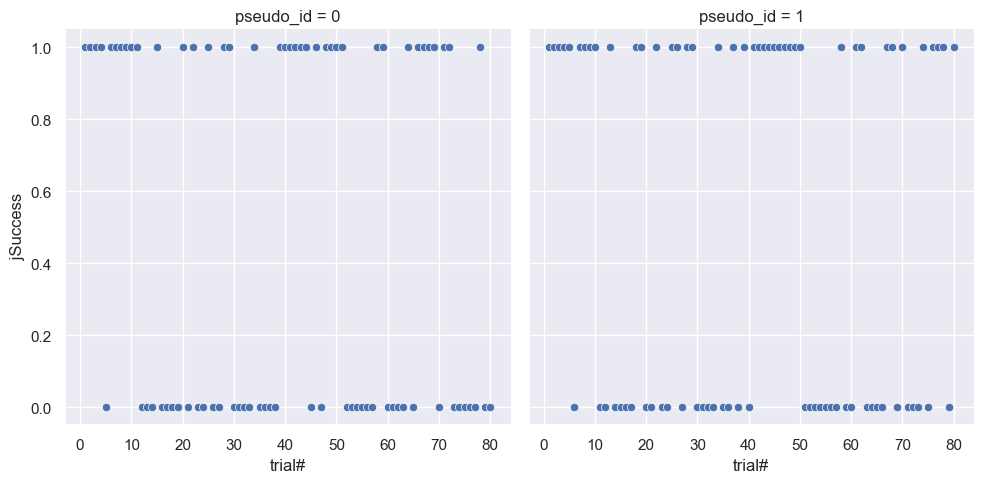

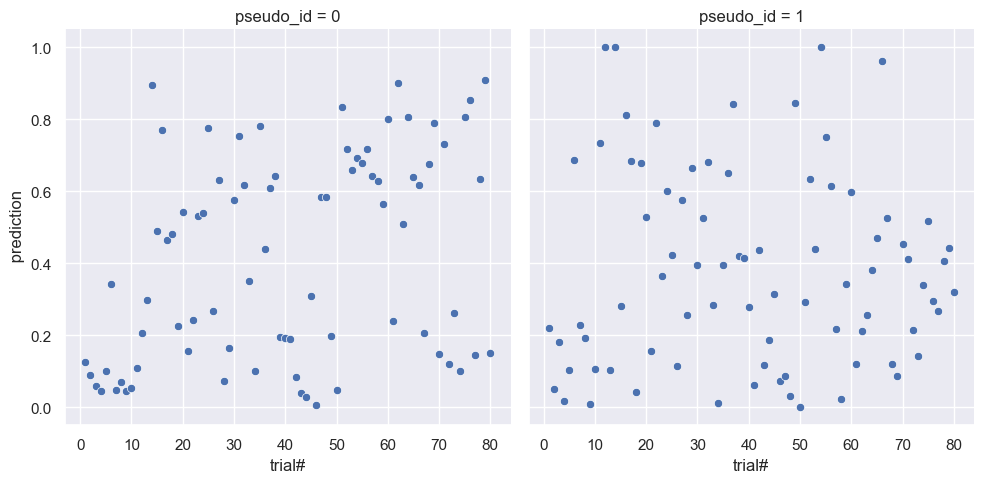

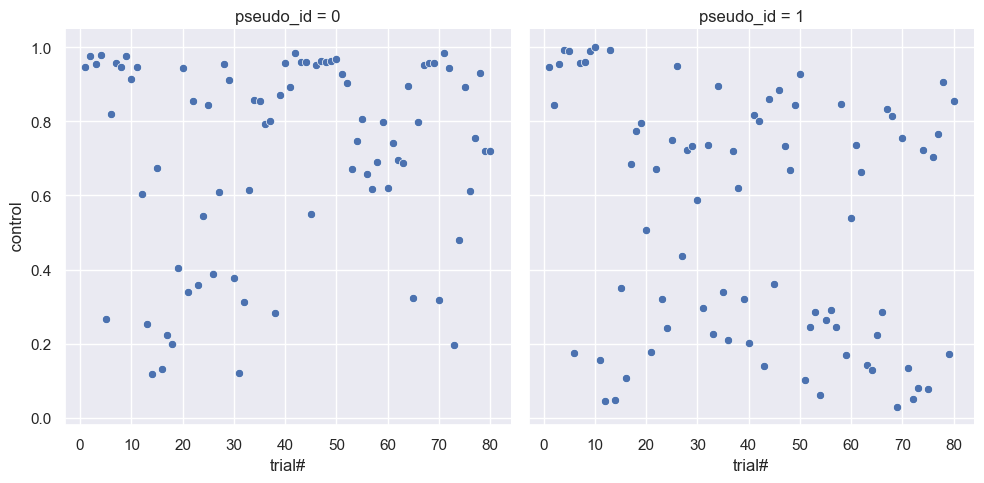

In [6]:
# Create a visualization
sns.relplot(data=df, x="trial#", y=" jSuccess", col="pseudo_id")
sns.relplot(data=df, x="trial#", y=" prediction", col="pseudo_id")
sns.relplot(data=df, x="trial#", y=" control", col="pseudo_id")

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

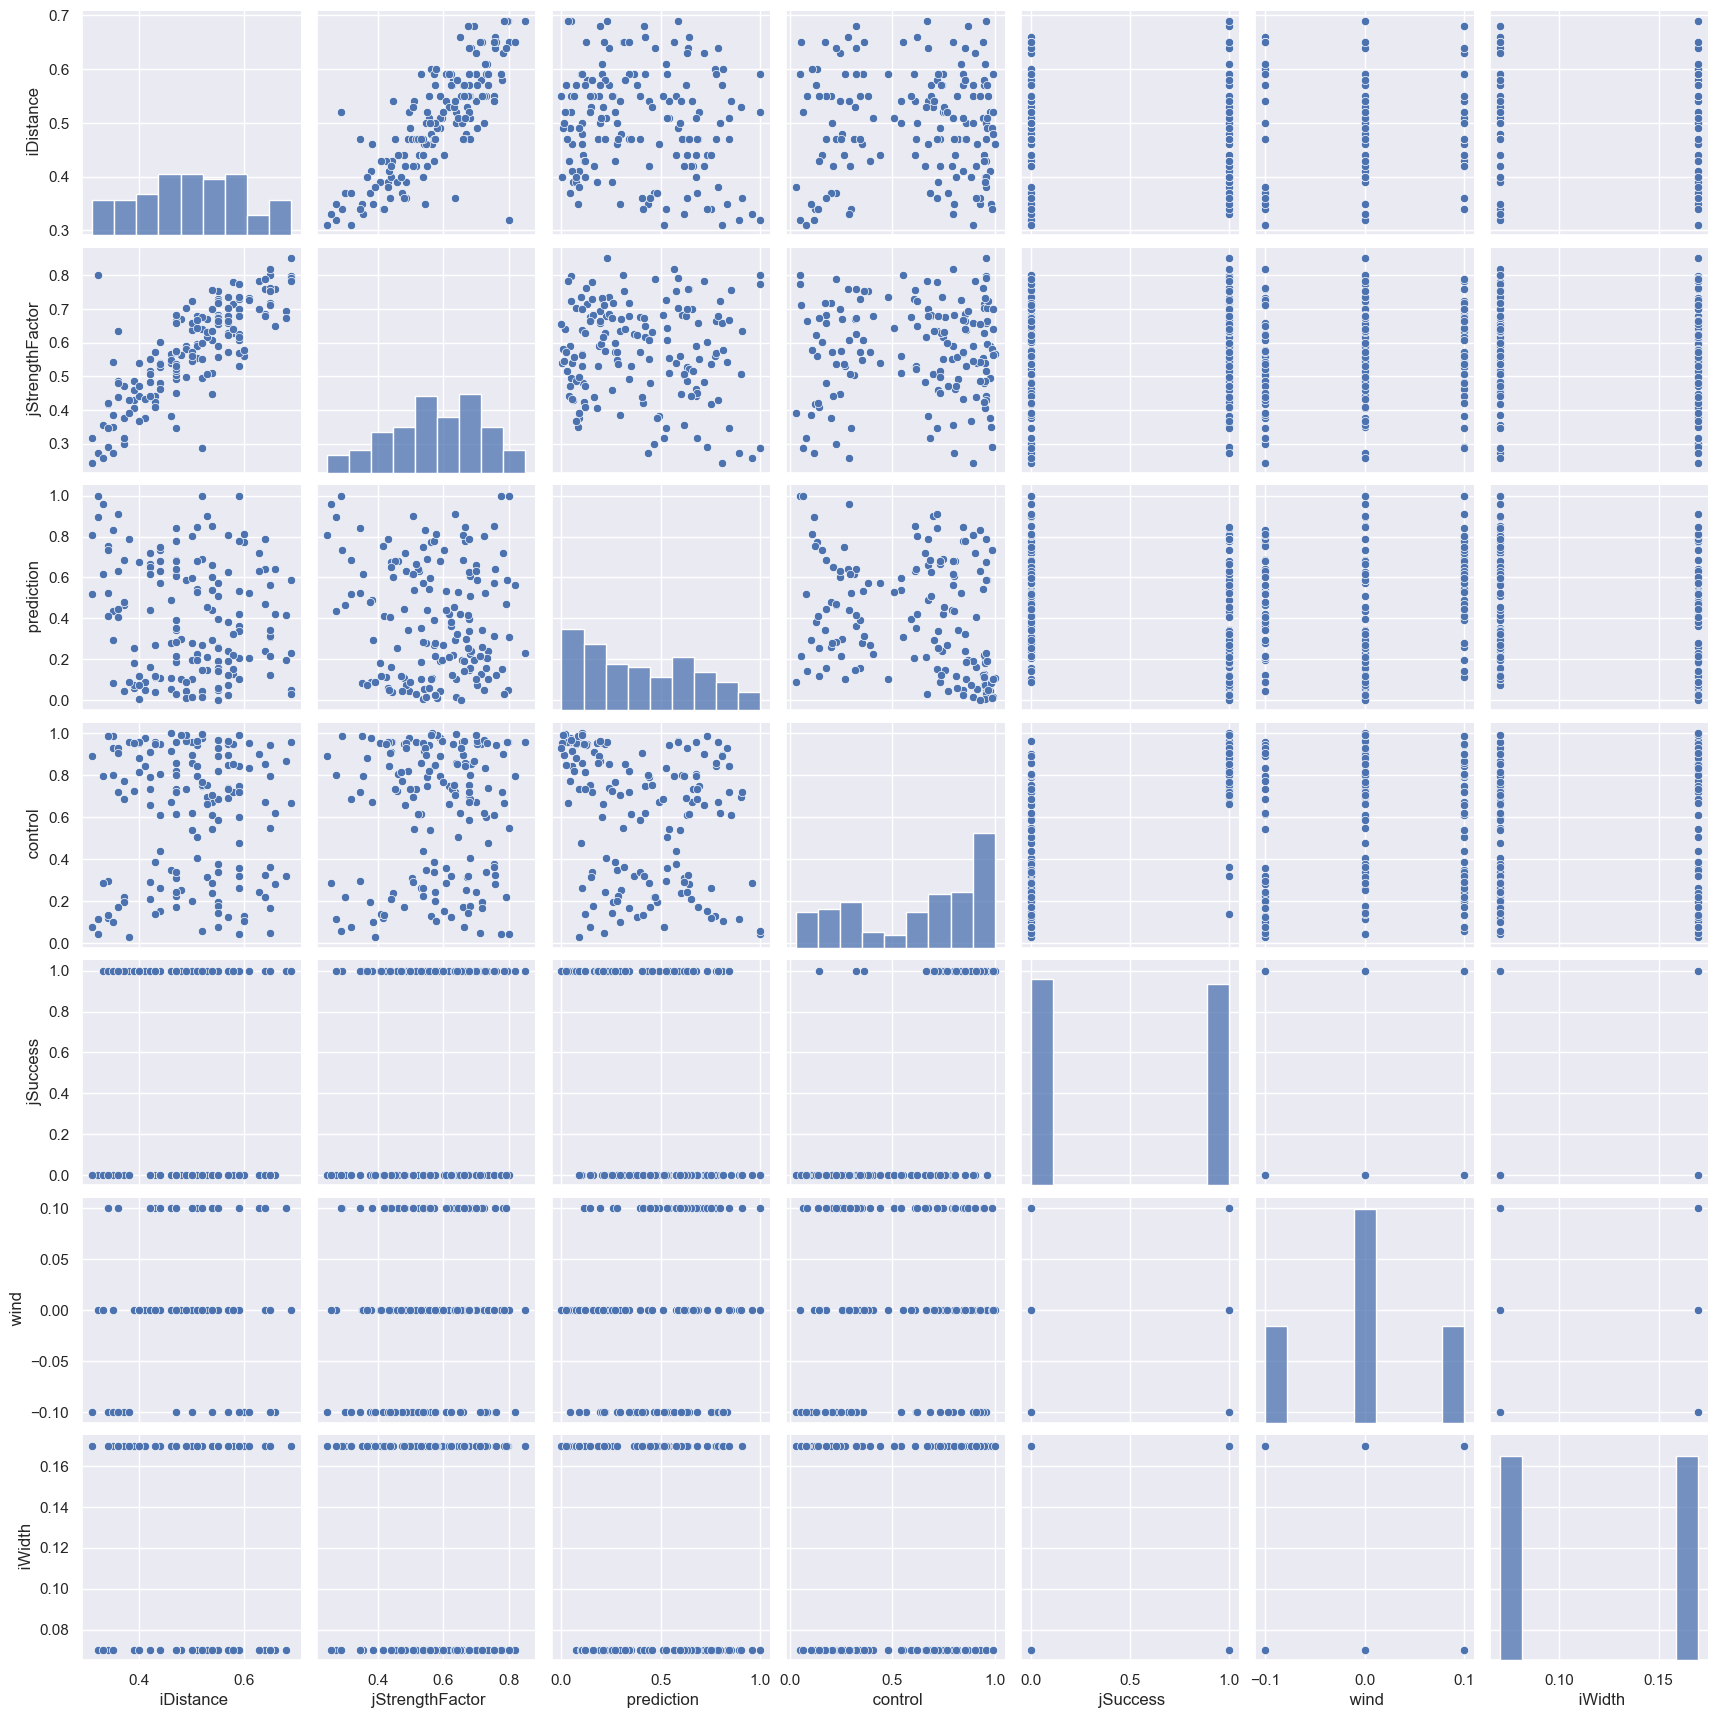

In [20]:
sns.pairplot(data=df[[' iDistance', ' jStrengthFactor', ' prediction', ' control', ' jSuccess', ' wind', ' iWidth']])
# sns.pairplot(data=df[[' iWidth', ' iDistance', ' wind', ' jAngle', ' jStrengthFactor', ' jSuccess', ' prediction', ' control']], hue="pseudo_id")

### Dependence of subsequent responses

- button box ids 0-2
- slider ids 3-5


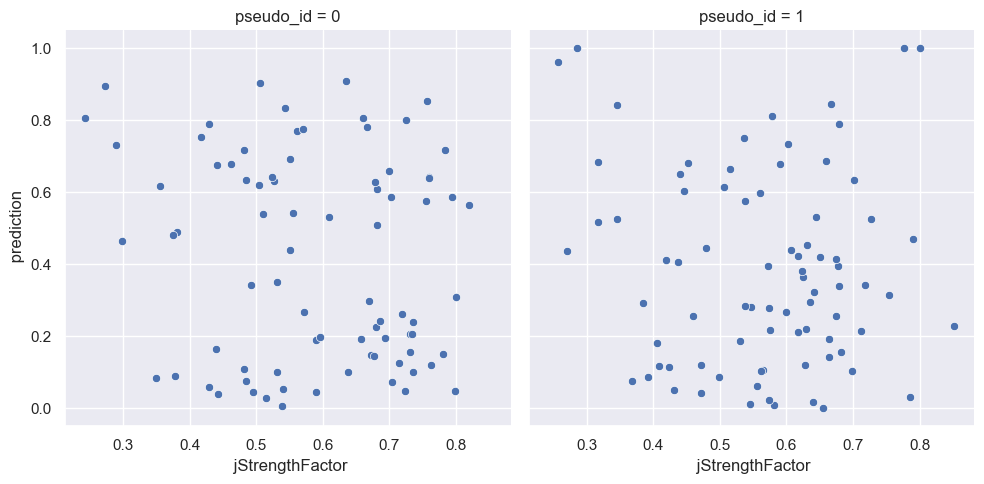

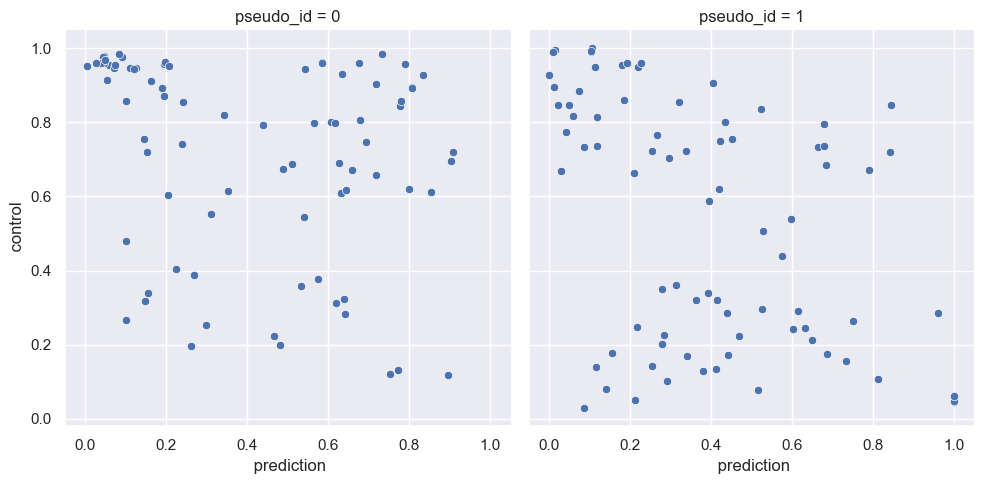

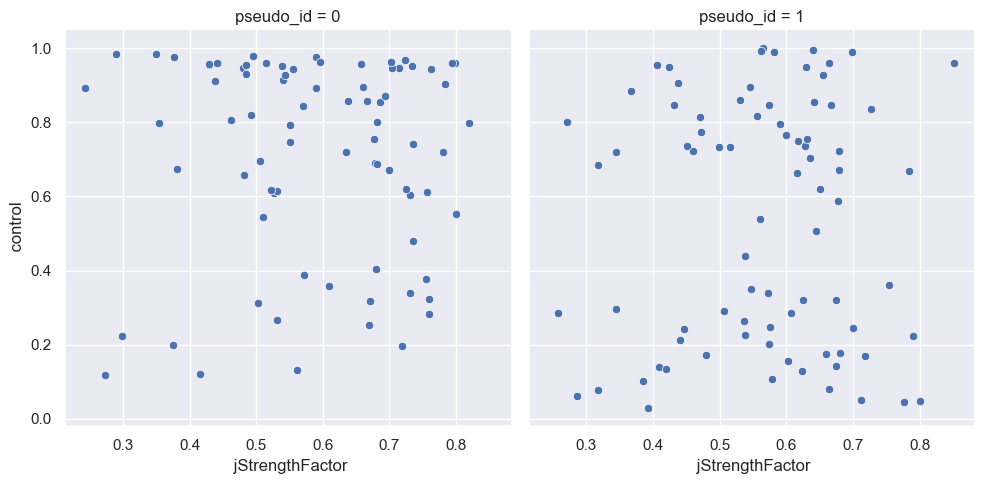

In [7]:
# Create a visualization of subsequent responses
sns.relplot(data=df, x=" jStrengthFactor", y=" prediction", col="pseudo_id")
sns.relplot(data=df, x=" prediction", y=" control", col="pseudo_id")
sns.relplot(data=df, x=" jStrengthFactor", y=" control", col="pseudo_id")

### Average responses (across sub) over trials

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

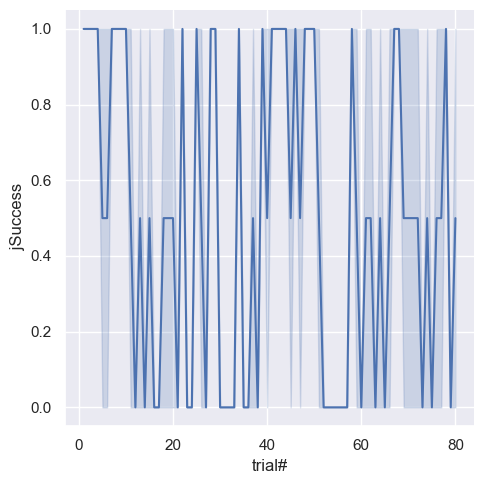

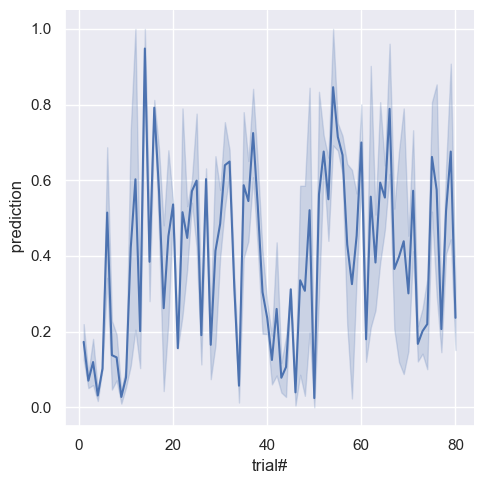

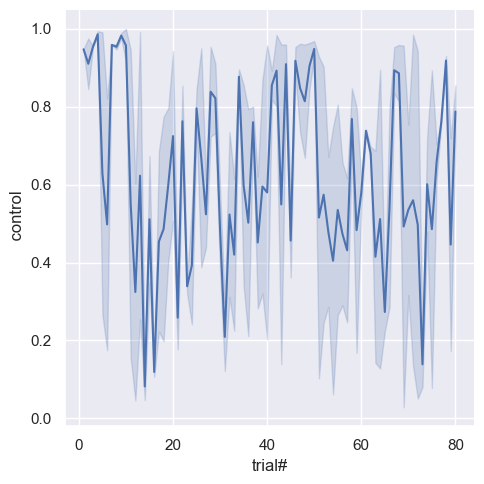

In [8]:
# Avg success (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" jSuccess")

# Avg prediction (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" prediction")

# Avg control rating (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" control")

### Distribution of task performance and responses

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a le

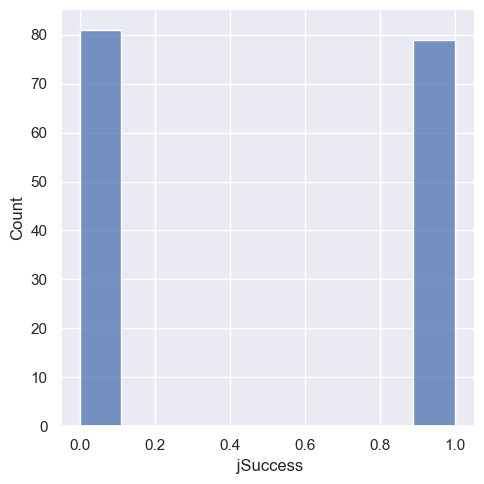

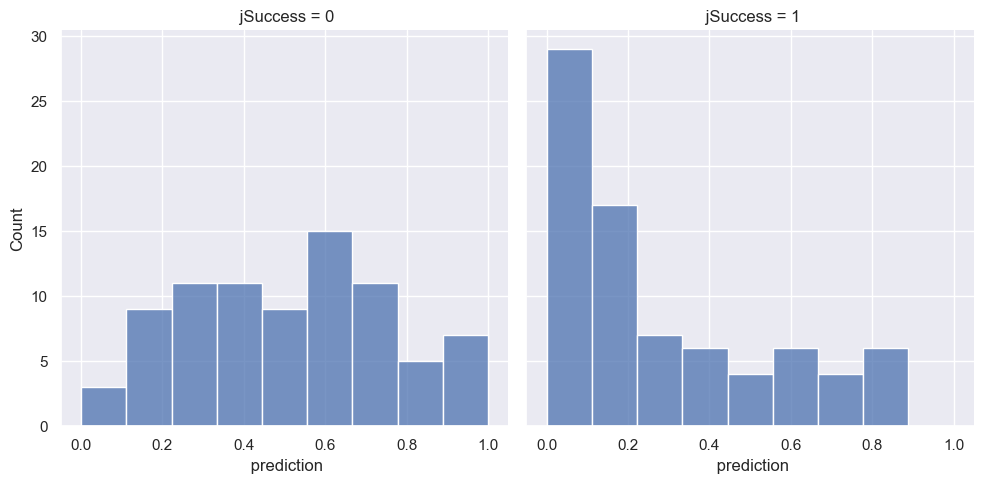

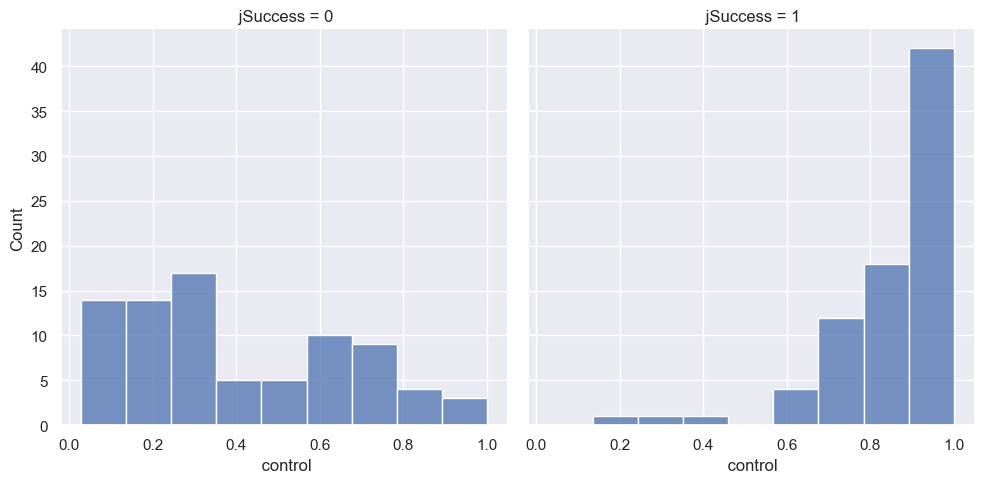

In [9]:
# distr of success/failures
sns.displot(data=df, x=" jSuccess")

# distr of predictions 
sns.displot(data=df, x=" prediction", col=" jSuccess")

# distr of control ratings
sns.displot(data=df, x=" control", col=" jSuccess")

&nbsp;
___
# Questionnaire data


C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

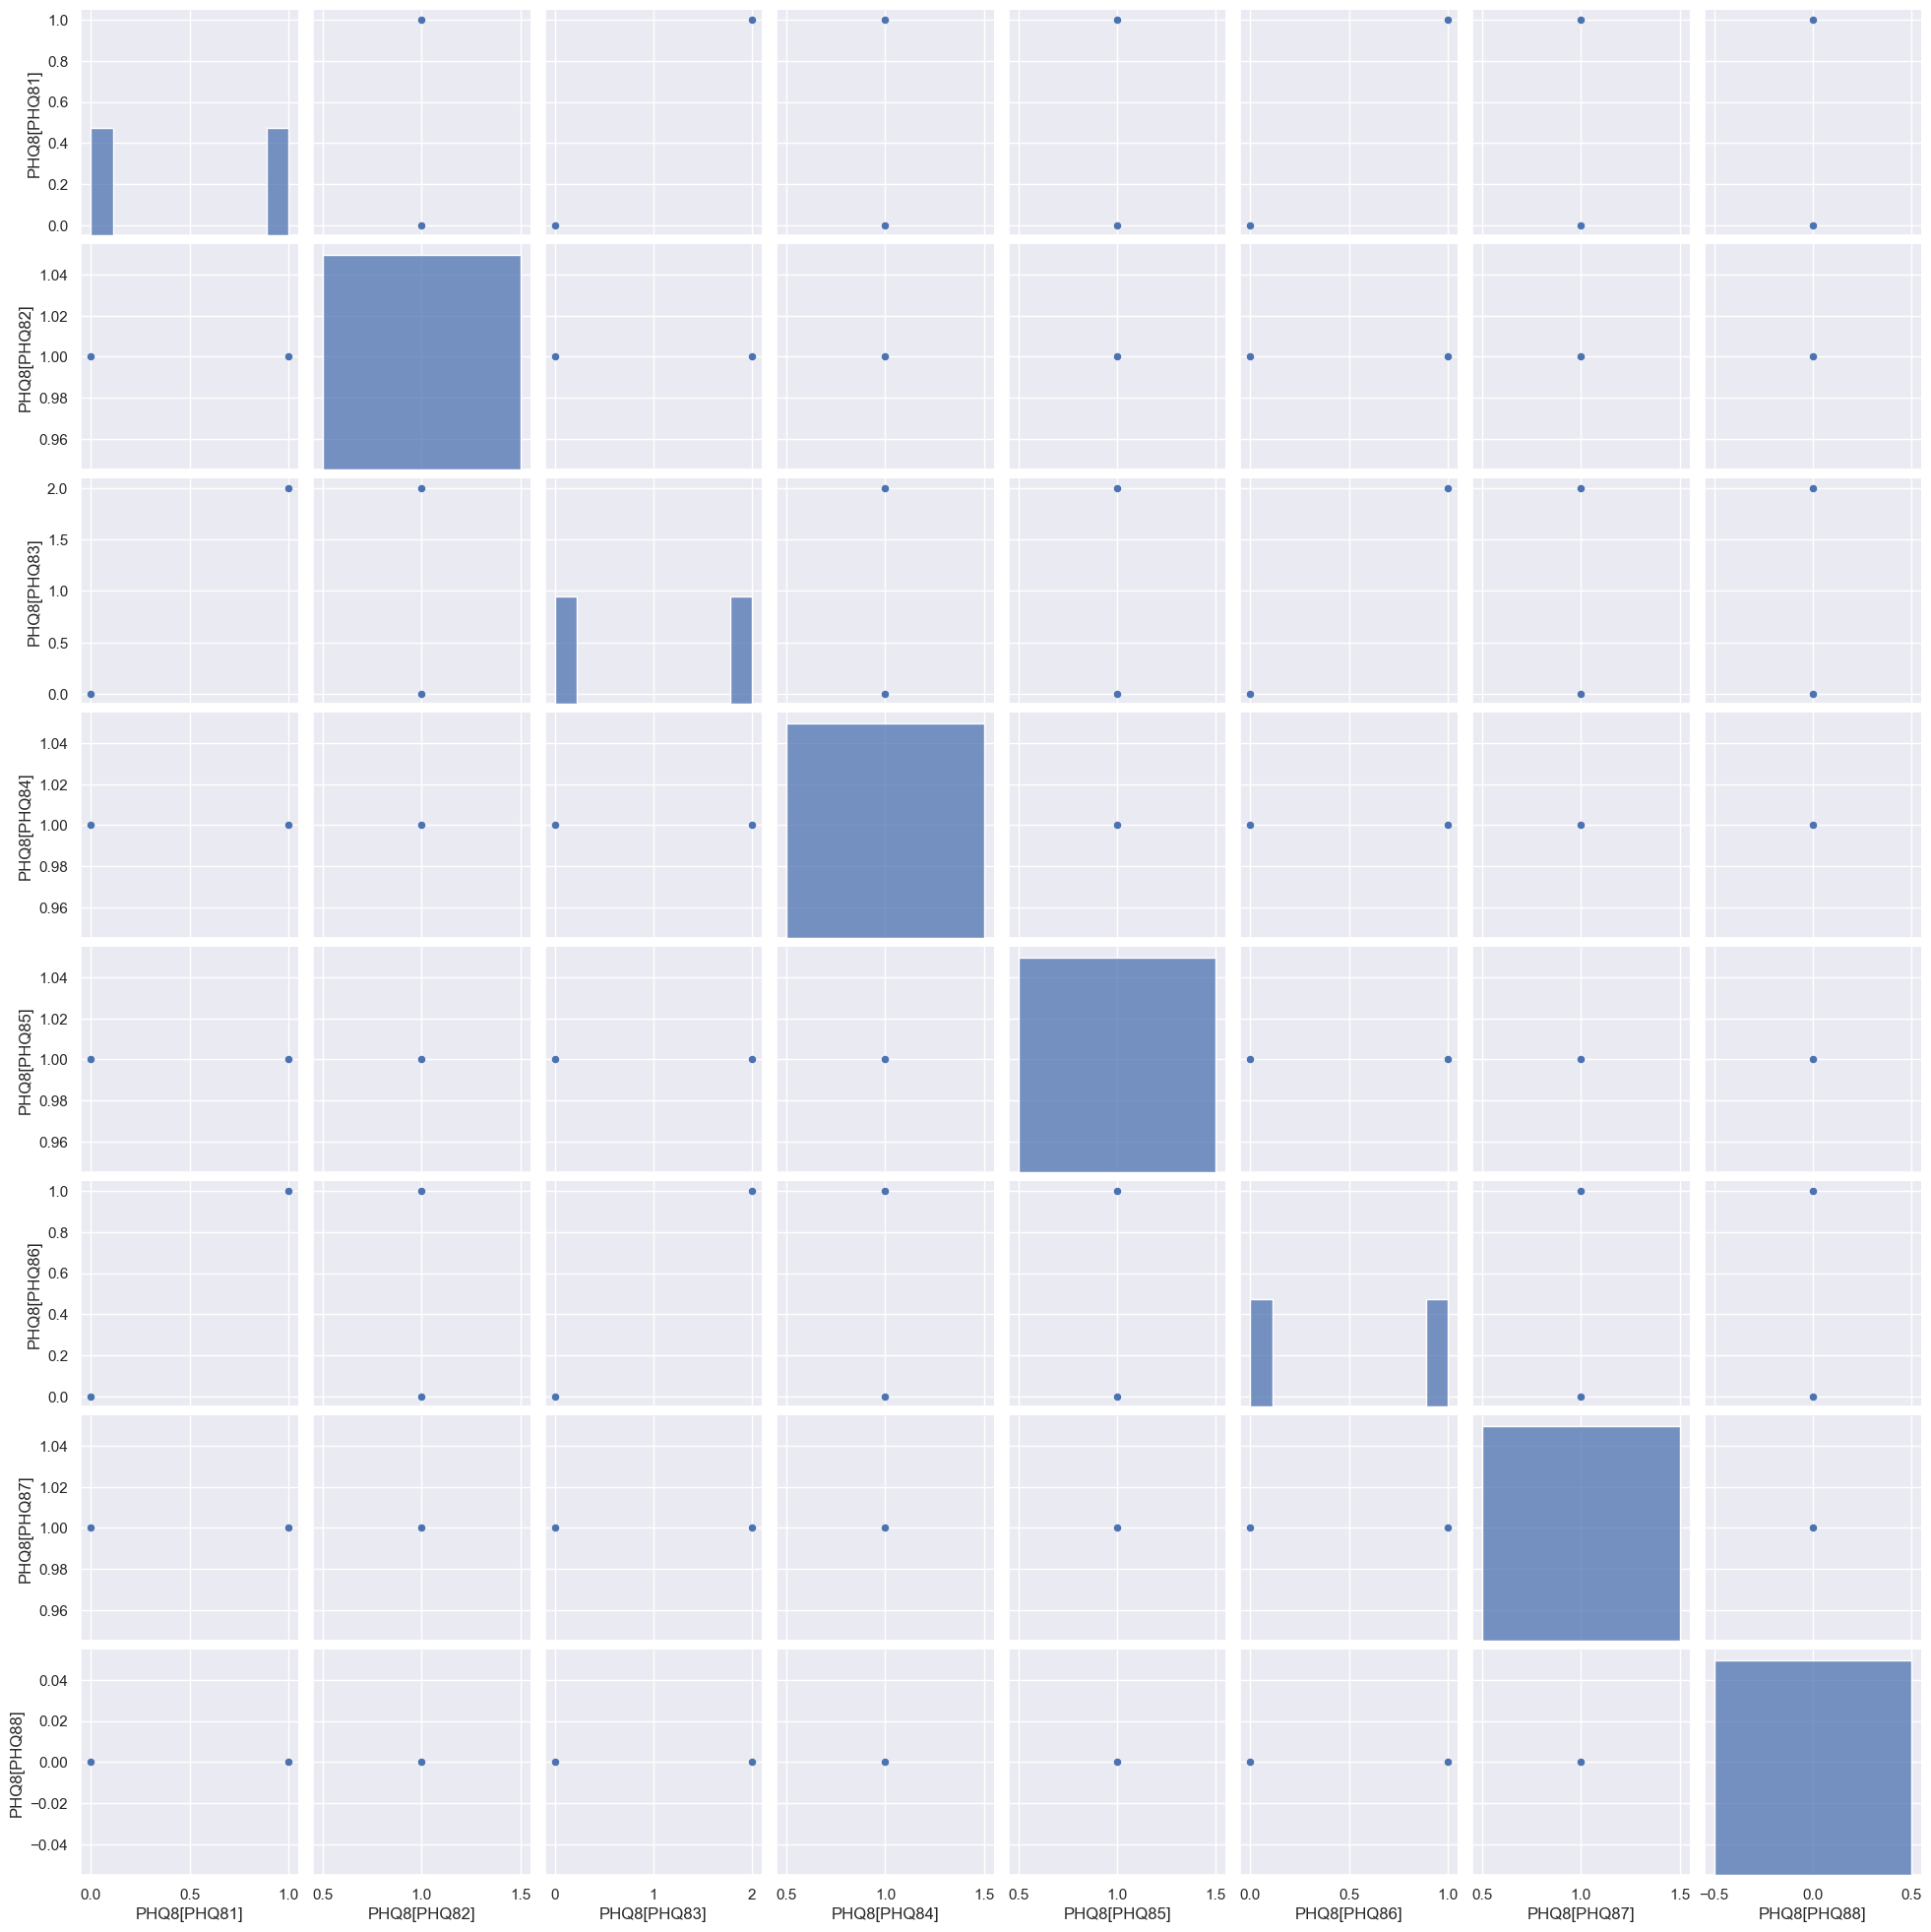

In [11]:
# check out sns.jointplot & sns.pairplot (https://seaborn.pydata.org/tutorial/introduction.html)

sns.pairplot(data=df[['PHQ8[PHQ81]', 'PHQ8[PHQ82]', 'PHQ8[PHQ83]', 'PHQ8[PHQ84]', 'PHQ8[PHQ85]', 'PHQ8[PHQ86]', 'PHQ8[PHQ87]', 'PHQ8[PHQ88]']])